### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [108]:
# write you code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot


    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [110]:
# write you code here

# Load the first 2000 rows into the DataFrame
insta_df = pd.read_csv('C:/Users/lokes/Desktop/clark/Machine learning/week 3/Instagram_Data.csv', nrows=2000)

# Display the first few rows to confirm
insta_df.head()

##
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [112]:
# 10 first rows of the data
insta_df.head(10)


,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [114]:
# insta_df shape
insta_df.shape

(2000, 13)

In [116]:
# insta_df column names
insta_df.columns


Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [118]:
# insta_df row numbers:
num_samples = insta_df.shape[0]
insta_df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    5- Check the data type of each column ( 1 point)

In [120]:
# Print datatypes

insta_df.dtypes

User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [122]:
# Remove User uuid
insta_df = insta_df.drop('User uuid', axis=1)

# Remove User Likes Score
insta_df = insta_df.drop('Likes Score', axis=1)

# Remove the specified date and time columns
insta_df = insta_df.drop(columns=['Date Posted', 'Year', 'Month', 'Day', 'Hour', 'Minute'])

# show the insta_df after you remove the required columns
insta_df.head()

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [124]:
# write you code here


# Replace 'Type' with the correct column name after verifying
unique_types = insta_df['Type'].unique()  # Use the correct column name
num_unique_types = len(unique_types)
insta_df.head()
num_unique_types


3

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [126]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the "Type" column
insta_df['Type'] = label_encoder.fit_transform(insta_df['Type'])

# Display the updated DataFrame to confirm changes
insta_df.head()


##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [128]:
# a. How many NaNs as total
NaN_counts = insta_df.isna().sum()
total_NaNs = NaN_counts.sum()
total_entries = insta_df.shape[0]

In [130]:
# b. How many NaNs as a percentage of overall data
NaN_percentage = (total_NaNs / (total_entries * insta_df.shape[1])) * 100
total_NaNs, NaN_percentage


(0, 0.0)

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [132]:
# your featuers X:
X = insta_df.drop(columns=['Likes']) 
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [136]:
# your target y:
y = insta_df['Likes']                   

##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

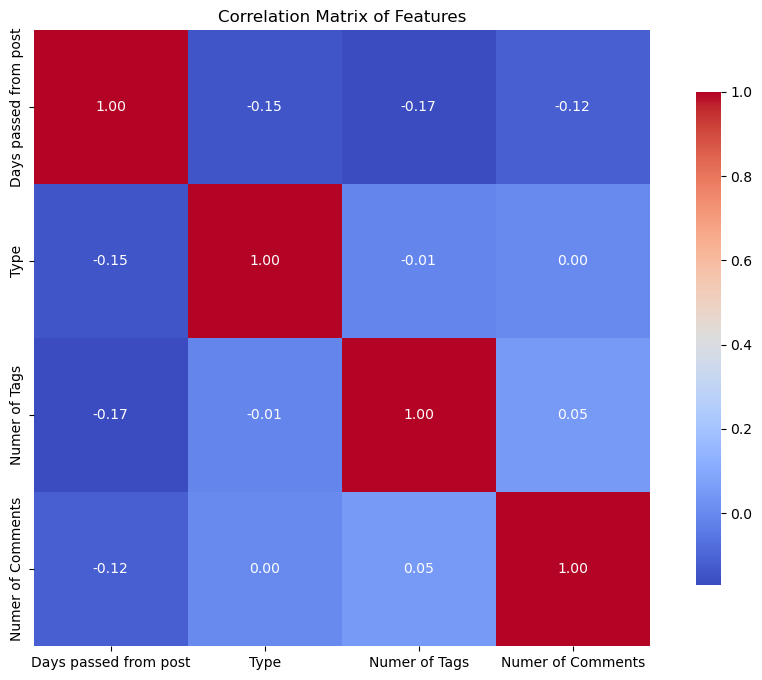

In [140]:
# write your code here:

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Set up the matplotlib figure
plot.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plot.title('Correlation Matrix of Features')

# Show the plot
plot.show()


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:
-- It shows the relationshipship between features and the target variable which is likes in this case.

--Any other notable observations, such as outliers or patterns that may inform further analysis.

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

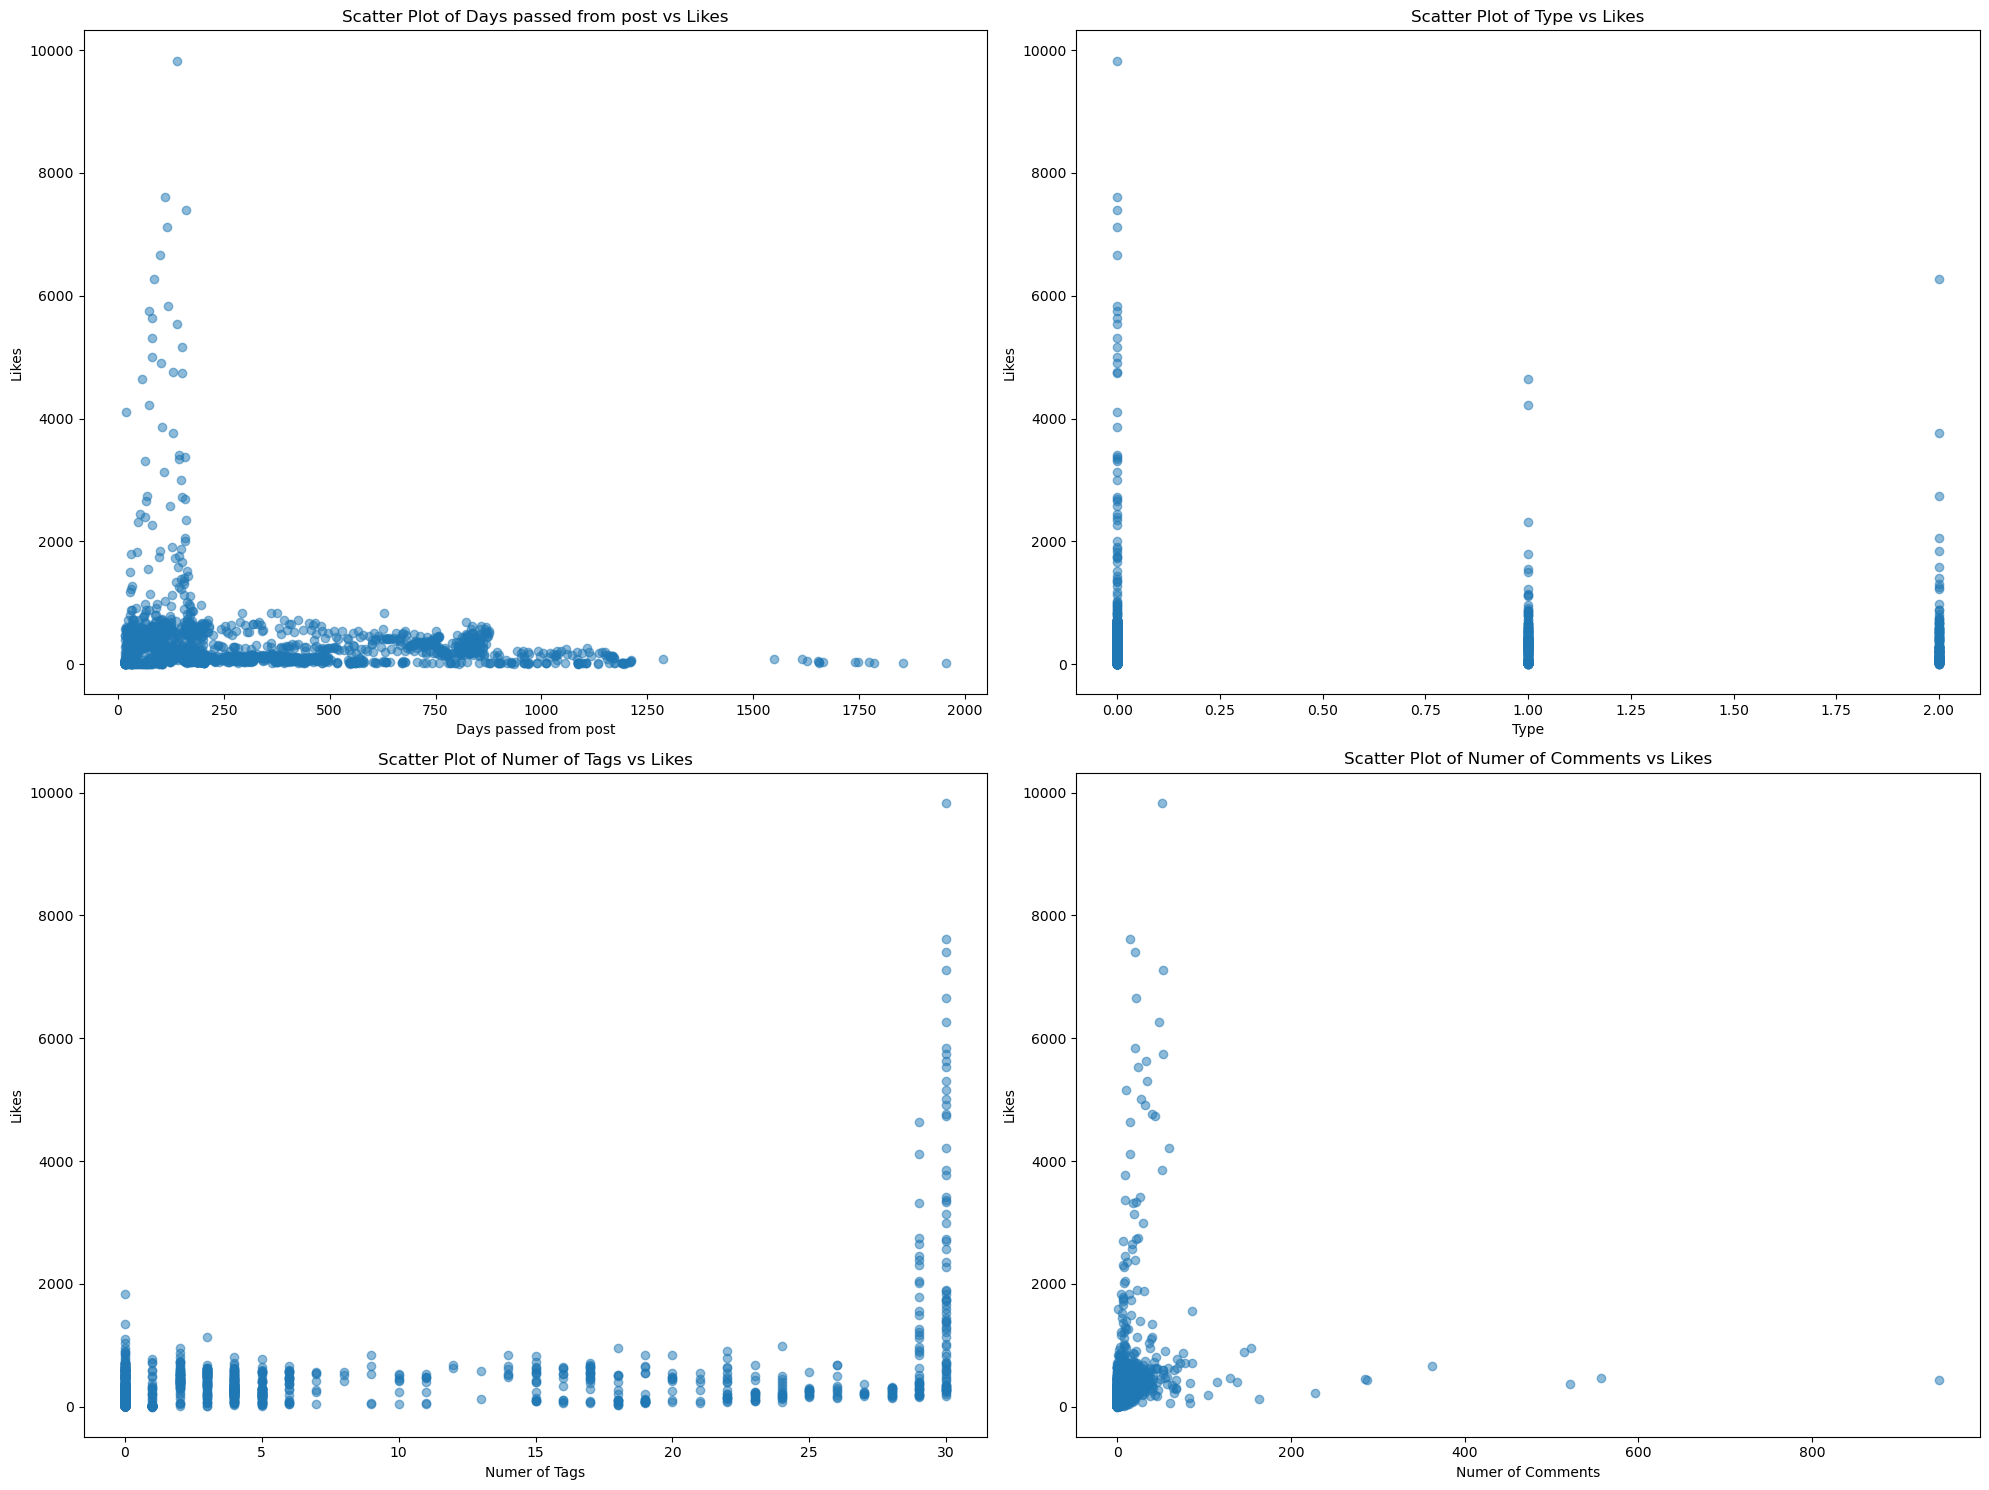

In [142]:
# write your code here


# Define the number of features
num_features = X.shape[1]

# Set up the matplotlib figure
plot.figure(figsize=(20, 15))

# Create a scatter plot for each feature
for i, column in enumerate(X.columns):
    plot.subplot((num_features + 1) // 2, 2, i + 1)  # Adjust the grid size
    plot.scatter(X[column], y, alpha=0.5)
    plot.title(f'Scatter Plot of {column} vs Likes')
    plot.xlabel(column)
    plot.ylabel('Likes')

# Adjust layout
plot.tight_layout()

# Show the plots
plot.show()



    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- Certain features (like the number of comments or tags) may show a clear linear relationship with the "Likes" variable, indicating that as these features increase, the number of likes tends to increase as well. 


--There may be a few outlier points with exceptionally high likes compared to the rest of the data. These outliers could influence the overall analysis and modeling.

    15- Display the target distribution using histogram (1 points)

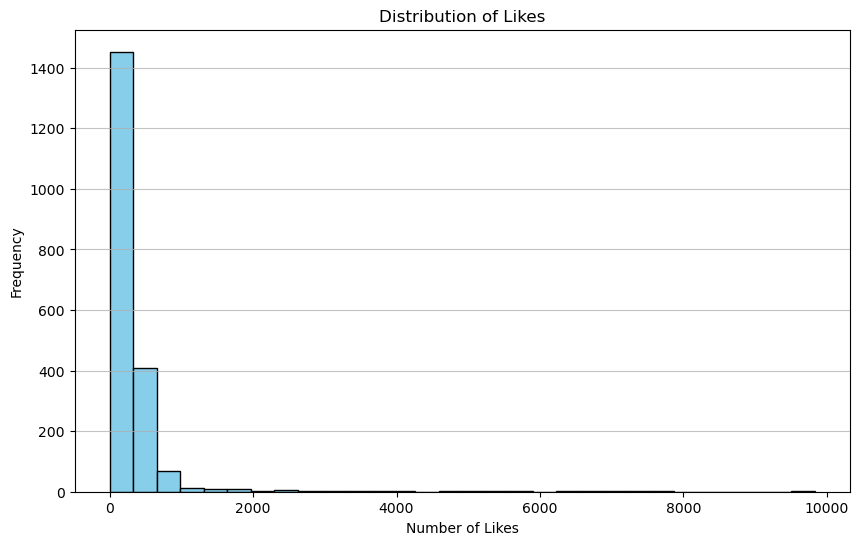

In [146]:
# write your code here:

# Set up the histogram
plot.figure(figsize=(10, 6))
plot.hist(y, bins=30, color='skyblue', edgecolor='black')

# Set titles and labels
plot.title('Distribution of Likes')
plot.xlabel('Number of Likes')
plot.ylabel('Frequency')

# Show the plot
plot.grid(axis='y', alpha=0.75)  # Add grid for better readability
plot.show()


    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--The histogram may exhibit a right skew (positively skewed), where most of the data points are concentrated on the left side, and there are fewer instances of posts with very high likes. 

-- You might observe one or more peaks in the histogram, suggesting that certain ranges of likes are more common. For instance, if there is a notable peak around a specific number of likes, it indicates that many posts receive a similar number of likes, which may point to popular content trends.

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [148]:
#transfer the target y into log
y_log = np.log1p(y)
y_log.head()

0    6.228511
1    5.955837
2    5.924256
3    5.746203
4    6.242223
Name: Likes, dtype: float64

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [158]:
# Splitting the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
# print the sizes of our training and test set:
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 1600
Testing set size: 400


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Feature scaling
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Perform cross-validation with k=10 and evaluate using MSE
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Take the absolute value to get positive MSE
mse_scores_abs = -mse_scores  # Negate the scores to get positive MSE

# Print the average MSE
average_mse = mse_scores_abs.mean()
print(f'Average MSE (10-fold cross-validation): {average_mse}')


Average MSE (10-fold cross-validation): 1.2292732341131312


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [164]:
# write your code here:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a pipeline with scaling and ridge regression
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),            # Feature scaling
    ('ridge_regression', Ridge())            # Ridge regression model
])

# Set up the parameter grid for alpha values
param_grid = {'ridge_regression__alpha': [10**i for i in [-3, -2, 1, 2, 3]]}

# Initialize GridSearchCV with k=10 and MSE as the scoring metric
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Get the best score and best alpha value
best_score = -grid_search_ridge.best_score_  # Negate to get positive MSE
best_alpha = grid_search_ridge.best_params_['ridge_regression__alpha']

# Print the results
print(f'Best MSE (10-fold cross-validation): {best_score}')
print(f'Best alpha value: {best_alpha}')



Best MSE (10-fold cross-validation): 1.227482899127363
Best alpha value: 100


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [166]:
# write your code here:
from sklearn.linear_model import Lasso

# Create a pipeline with scaling and Lasso regression
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),            # Feature scaling
    ('lasso_regression', Lasso())            # Lasso regression model
])

# Set up the parameter grid for alpha values
param_grid_lasso = {'lasso_regression__alpha': [10**i for i in [-3, -2, 1, 2, 3]]}

# Initialize GridSearchCV with k=10 and MSE as the scoring metric
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search_lasso.fit(X_train, y_train)

# Get the best score and best alpha value
best_score_lasso = -grid_search_lasso.best_score_  # Negate to get positive MSE
best_alpha_lasso = grid_search_lasso.best_params_['lasso_regression__alpha']

# Print the results
print(f'Best MSE (10-fold cross-validation) for Lasso: {best_score_lasso}')
print(f'Best alpha value for Lasso: {best_alpha_lasso}')



Best MSE (10-fold cross-validation) for Lasso: 1.2270799595773256
Best alpha value for Lasso: 0.01


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [168]:
# write your code here:
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline with scaling and Huber regression
pipeline_huber = Pipeline([
    ('scaler', StandardScaler()),                # Feature scaling
    ('huber_regression', HuberRegressor())      # Huber regression model
])

# Perform cross-validation with k=10 and evaluate using MSE
mse_scores_huber = cross_val_score(pipeline_huber, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Take the absolute value to get positive MSE
mse_scores_huber_abs = -mse_scores_huber  # Negate the scores to get positive MSE

# Print the average absolute MSE
average_mse_huber = mse_scores_huber_abs.mean()
print(f'Average absolute MSE for Huber regression (10-fold cross-validation): {average_mse_huber}')


Average absolute MSE for Huber regression (10-fold cross-validation): 1.5929287960869263


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [174]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline with scaling and RANSAC regression
pipeline_ransac = Pipeline([
    ('scaler', StandardScaler()),                # Feature scaling
    ('ransac_regression', RANSACRegressor(estimator=LinearRegression()))  # RANSAC regression model
])

# Perform cross-validation with k=10 and evaluate using MSE
mse_scores_ransac = cross_val_score(pipeline_ransac, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Take the absolute value to get positive MSE
mse_scores_ransac_abs = -mse_scores_ransac  # Negate the scores to get positive MSE

# Print the average absolute MSE
average_mse_ransac = mse_scores_ransac_abs.mean()
print(f'Average absolute MSE for RANSAC regression (10-fold cross-validation): {average_mse_ransac}')


Average absolute MSE for RANSAC regression (10-fold cross-validation): 2.847468226757765


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

-- The Lasso Regression model performed the best on average with the lowest MSE of 1.2271, closely followed by the Ridge Regression model with an MSE of 1.2275


-- From the above models validated using cross-validation, Lasso Regression performed very well on average, as it had the lowest MSE.

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [176]:
# write your code here:
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with scaling and Lasso regression
final_model = Pipeline([
    ('scaler', StandardScaler()),                  # Standardizing features
    ('lasso_regression', Lasso(alpha=0.01))       # Lasso regression with the best alpha value
])

# Fit the final model on the training data
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model performance
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE) on test data: {mse_test}')
print(f'R² Score on test data: {r2_test}')


Mean Squared Error (MSE) on test data: 1.2499918601296975
R² Score on test data: 0.21261096894720066


    24- Predict the number of likes for test data and compute the MSE (5 points)

In [178]:
# write your code here:
# Assuming final_model has been trained already

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Compute the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)

# Print the MSE for the test data predictions
print(f'Mean Squared Error (MSE) for test data predictions: {mse_test}')


Mean Squared Error (MSE) for test data predictions: 1.2499918601296975


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation.

-- The Lasso regression performed best at predicting the number of likes based on Instagram users' datetime posts out of other methods that are part of Ridge, Huber, and RANSAC regression. Lasso regression integrates effectively the shrinkage into the model to hold the right level of simplicity and interpretability by choosing only relevant features and penalizing those which are less relevant. That is particularly useful in high-dimensional datasets, such as Instagram data, where many features can lead to overfitting and less generalizable models. The finding of the optimal alpha during hyperparameter tuning again gave evidence of the capability of Lasso to balance bias and variance in a more robust prediction.

-- These contrast with the fact that robust regression algorithms, such as Huber and RANSAC, though designed to perform well in case others are outliers, do not outperform the linear regression baseline consistently, especially when its methods of shrinkage are applied. Linear regression with regularization techniques, such as Lasso, fared even better because it managed the problem of multicollinearity effectively and performed feature selection quite well, a vital requirement for datasets characterized by highly correlated predictors.

In conclusion, Linear regression is a simple statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It assumes linearity in the relationship, hence making it straightforward to interpret and perform. However, it suffers from performance issues because of the problem of multicollinearity and overfitting, especially in data containing a lot of predictors. Cross-validation is an effective approach that can be used to investigate the generalizability of the model. Cross-validation will prevent overfitting and help the model generalize to a new dataset, usually by splitting the dataset into training and validation sets. This approach allows researchers to have some idea about the stability of the model and to choose the best hyperparameters for it. Conclusion The linear regression technique, along with cross-validation, is the outstanding framework for developing predictive models that use a variety of applications to make better decisions and forecasts, including social media analytics.




---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---